In [1]:
import nlopt
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from optlib import optical as opt
import pickle

np.seterr(divide='ignore', invalid='ignore')

plt.rcParams.update({
#     "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
plt.rcParams['font.size'] = 16
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib notebook

In [4]:
xraypath = '../Henke/'
oscpath = '../OscillatorsLibrary/'

In [ ]:
fd = pd.read_csv('/Users/olgaridzel/Research/olga-optical-data/tpp_data.dat',sep='\t',header=None)
tpp_data = fd.values
tpp = np.loadtxt('tpp2m_formula_newdata.dat',skiprows=1)

*To save class object*

In [7]:
with open(oscpath + 'Insulators/pmma_drude_no_dispersion.pkl', 'wb') as output:
    pickle.dump(pmma_drude, output, pickle.HIGHEST_PROTOCOL)

*To load class object*

In [5]:
with open(oscpath + 'Insulators/pmma_drude_no_dispersion.pkl', 'rb') as input:
    pmma_drude = pickle.load(input)
pmma_drude.q_dependency = 1
pmma_drude.oscillators.alpha = 0.25

In [10]:
fd = pd.read_csv('../diimfp/pmma_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

In [11]:
opt_ = opt.OptFit(pmma_drude, x_exp, y_exp, 1600)

In [12]:
result = opt_.runOptimisation(maxeval = 1000, xtol_rel = 1e-6)

In [13]:
oscOptimised = opt_.vec2Struct(result)

In [14]:
print(f'A: {oscOptimised.oscillators.A}')
print(f'Gamma: {oscOptimised.oscillators.gamma}')
print(f'Omega: {oscOptimised.oscillators.omega}')

A: [23.51012668 38.65253955 26.16345266 43.15362061 27.55259471 28.94863585
 25.09096498 23.50788502 41.27212203 19.67365327 15.70704099 18.90325541
 14.96686787 10.35719724 34.12799627]
Gamma: [ 1.83122186  2.4738436   2.18836033  4.84006878  3.86541663  4.96927858
  5.08929952  8.66155865  9.70808446 19.83860949 33.66848113 29.3435498
 30.29989952 28.64831669 67.07281756]
Omega: [ 9.24595168 10.07259129 11.14508416 11.45320281 13.79904719 15.30837376
 19.07422961 20.68664232 26.0543162  26.65482442 46.95967651 70.86450729
 77.31154895 74.28125791 91.15240394]


In [ ]:
with open(oscpath + f'Insulators/{oscOptimised.name}_{oscOptimised.model}_q_dispersion.pkl', 'wb') as output:
    pickle.dump(oscOptimised, output, pickle.HIGHEST_PROTOCOL)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


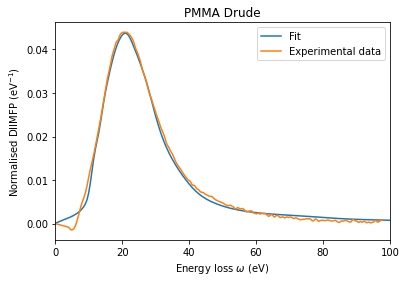

In [11]:
oscOptimised.calculateDIIMFP(opt_.E0)

plt.figure()
plt.plot(oscOptimised.DIIMFP_E,oscOptimised.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

In [14]:
with open(oscpath + 'Insulators/pmma_drude_no_dispersion.pkl', 'rb') as input:
    pmma_drude_no_dispersion = pickle.load(input)
with open(oscpath + 'Insulators/pmma_drude_full_dispersion.pkl', 'rb') as input:
    pmma_drude_full_dispersion = pickle.load(input)

E0 = np.hstack((opt.linspace(20,50),opt.linspace(60,100,10),opt.linspace(200,500,100),opt.linspace(1000,5000,1000)))

oscOptimised.calculateIMFP(E0,isMetal=False)
pmma_drude_no_dispersion.calculateIMFP(E0,isMetal=False)
pmma_drude_full_dispersion.calculateIMFP(E0,isMetal=False)

<IPython.core.display.Javascript object>


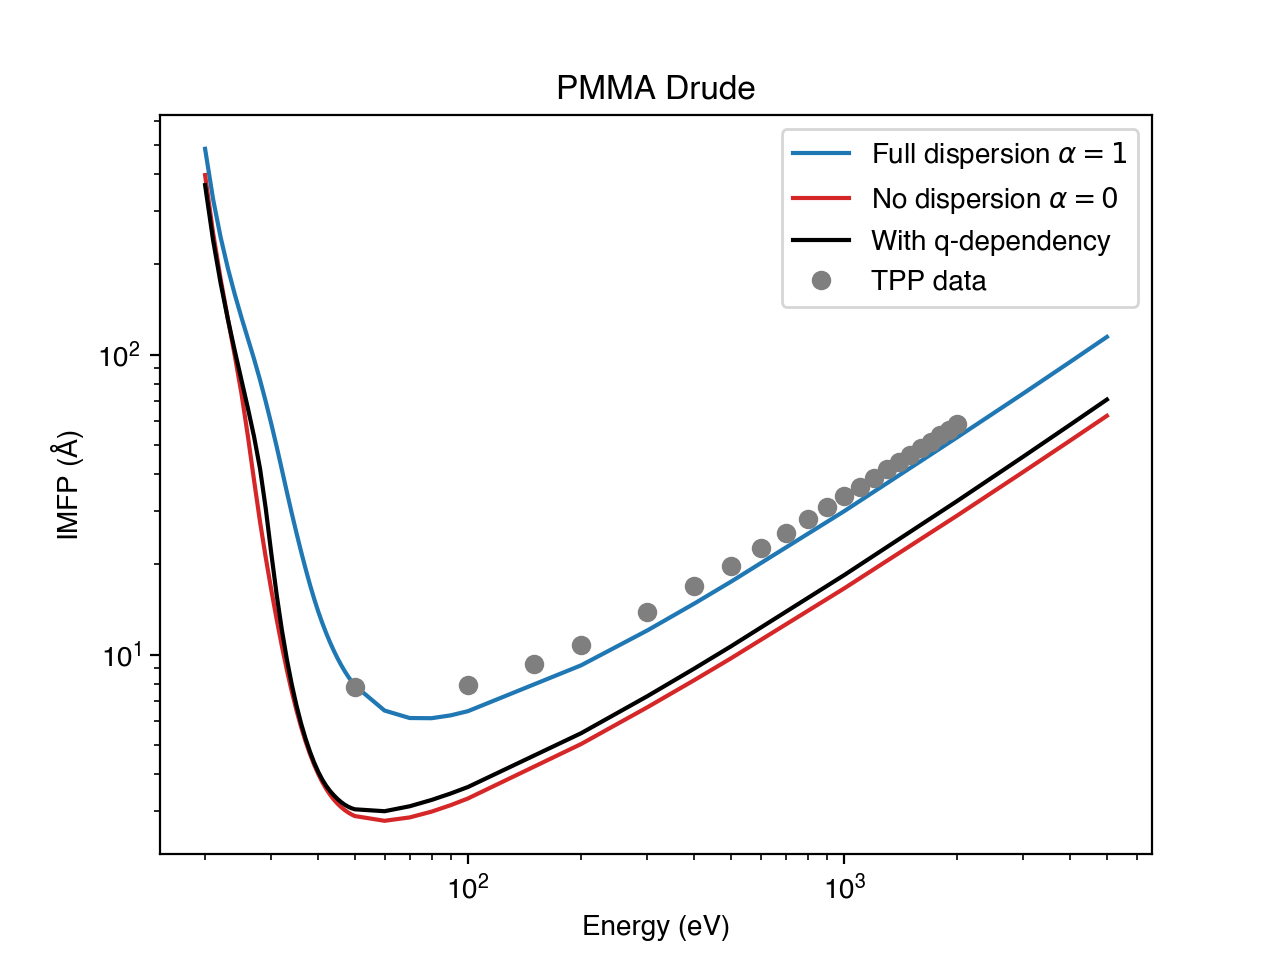

In [23]:
plt.figure()
plt.plot(E0, pmma_drude_full_dispersion.IMFP,label='Full dispersion $\\alpha = 1$',color='tab:blue')
plt.plot(E0, pmma_drude_no_dispersion.IMFP,label='No dispersion $\\alpha = 0$',color='tab:red')
plt.plot(E0, oscOptimised.IMFP,label='With q-dependency',color='black')
plt.plot(tpp_data[:,0],tpp_data[:,12],'o',label='TPP data',color='tab:gray')
plt.xlabel('Energy (eV)')
plt.ylabel('IMFP ($\mathrm{\AA}$)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.show()

In [24]:
plt.savefig('pmma_imfp.png', dpi=600)

In [9]:
fsum = pmma_drude.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(pmma_drude.Z))

kksum = pmma_drude.evaluateKKsum()
print('KKSum = {}'.format(kksum))

FSum = 3.394766024697279
Z = 3.6
KKSum = 1.0992994213165932


In [ ]:
fd = pd.read_csv('../MATLAB/organic/dna/dna_physdat_die.txt',header=None,sep=' ')
exp_elf = fd.values
oscOptimised.calculateELF()

plt.figure()
plt.plot(oscOptimised.eloss,oscOptimised.ELF,label='Fit')
plt.plot(exp_elf[:,0],exp_elf[:,3],label='Literature')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('ELF')
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.xlim(0,100)
plt.legend()
plt.show()

**PTFE**

In [ ]:
A = [0.93,3.87,39.19,15.06,38.65,92.64,105,185,168.28]
gamma = [0.4,1.04,3.27,4.6,5.28,11.81,21.96,41.3,91.86]
omega = [7.94,12.38,15.57,19.54,20.42,26.11,36.96,52.95,86.83]
oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = 1)
composition = opt.Composition(['c','f'], [2,4])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

ptfe_drude_full_dispersion = opt.Material('PTFE', oscillators, composition, eloss, q, xraypath)
ptfe_drude_full_dispersion.Eg = 7.2
ptfe_drude_full_dispersion.width_of_the_valence_band = 5.5
ptfe_drude_full_dispersion.atomic_density = 0.078
ptfe_drude_full_dispersion.static_refractive_index = 1.39
ptfe_drude_full_dispersion.electron_density = 0.47
ptfe_drude_full_dispersion.Z = 8
ptfe_drude_full_dispersion.omega_pl = np.sqrt(4*math.pi*ptfe_drude_full_dispersion.electron_density*opt.a0**3) * opt.h2ev
ptfe_drude_full_dispersion.q_dependency = None

In [17]:
fd = pd.read_csv('../diimfp/ptfe_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

In [18]:
opt_ptfe = opt.OptFit(ptfe_drude, x_exp, y_exp, 1600)

In [19]:
result_ptfe = opt_ptfe.runOptimisation(maxeval=500)

In [25]:
oscOptimised_ptfe = opt_ptfe.vec2Struct(result_ptfe)

In [26]:
print(f'A: {oscOptimised_ptfe.oscillators.A}')
print(f'Gamma: {oscOptimised_ptfe.oscillators.gamma}')
print(f'Omega: {oscOptimised_ptfe.oscillators.omega}')

A: [  1.70214443   8.81511872  61.1201423   13.4627151   43.31741923
 115.43576839 142.24265235 121.78523765 142.67845108]
Gamma: [ 0.47238944  0.79988263  3.87915398  4.02891693  4.82718217 13.41397997
 21.252284   28.26850285 97.00088824]
Omega: [  7.77815921  11.64136415  14.11954769  12.03844574  18.9677433
  24.60798033  37.6621674   56.48512844 142.75684817]


In [5]:
with open(oscpath + f'Insulators/{oscOptimised.name}_{oscOptimised.model}_q_dispersion.pkl', 'wb') as output:
    pickle.dump(oscOptimised, output, pickle.HIGHEST_PROTOCOL)

<IPython.core.display.Javascript object>


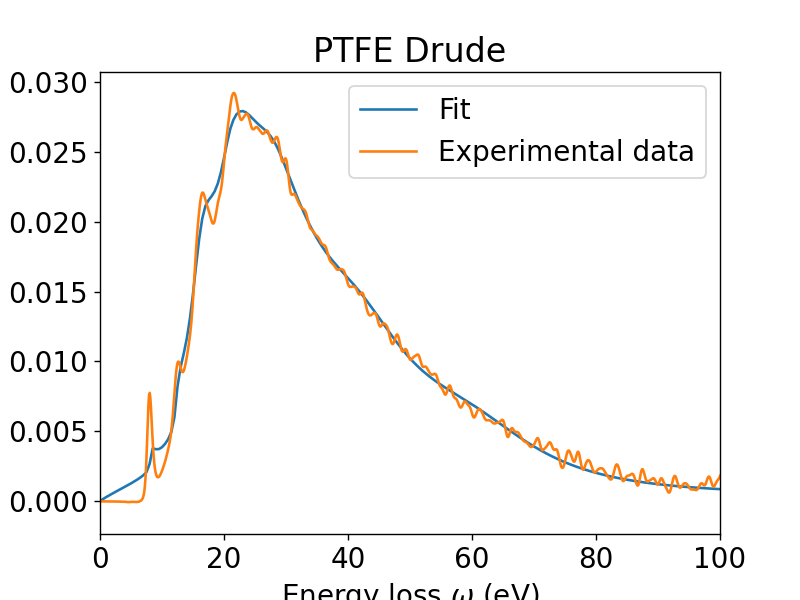

In [27]:
plt.figure()
plt.plot(oscOptimised_ptfe.DIIMFP_E,oscOptimised_ptfe.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised_ptfe.name} {oscOptimised_ptfe.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

In [30]:
fsum = oscOptimised.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised.Z))

kksum = oscOptimised.evaluateKKsum()
print('KKSum = {}'.format(kksum))

In [ ]:
with open(oscpath + 'Insulators/ptfe_drude_no_dispersion.pkl', 'rb') as input:
    ptfe_drude_no_dispersion = pickle.load(input)
with open(oscpath + 'Insulators/ptfe_drude_full_dispersion.pkl', 'rb') as input:
    ptfe_drude_full_dispersion = pickle.load(input)

E0 = np.hstack((opt.linspace(20,50),opt.linspace(60,100,10),opt.linspace(200,500,100),opt.linspace(1000,5000,1000)))

oscOptimised.calculateIMFP(E0,isMetal=False)
ptfe_drude_no_dispersion.calculateIMFP(E0,isMetal=False)
ptfe_drude_full_dispersion.calculateIMFP(E0,isMetal=False)

In [ ]:
plt.figure()
plt.plot(E0, ptfe_drude_full_dispersion.IMFP,label='Full dispersion $\\alpha = 1$',color='tab:blue')
plt.plot(E0, ptfe_drude_no_dispersion.IMFP,label='No dispersion $\\alpha = 0$',color='tab:red')
plt.plot(E0, oscOptimised.IMFP,label='With q-dependency',color='black')
plt.plot(tpp[:,0],tpp[:,1],'o',label='TPP data',color='tab:gray')
plt.xlabel('Energy (eV)')
plt.ylabel('IMFP ($\mathrm{\AA}$)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title(f'{oscOptimised.name} {oscOptimised.oscillators.model}')
plt.show()

In [ ]:
plt.savefig('ptfe_imfp.png',dpi=600)

**Al**

In [ ]:
A = [210]
gamma = [0.53]
omega = [3]
oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = 0.3)
composition = opt.Composition(['al'], [1])
eloss = opt.linspace(opt.machine_eps,100,0.7)
q = 0

M = 26.9815386 # Molar weight
rho = 2.6989 # g/cm3
N_Avogadro = 6.02217e23 

al_drude = opt.Material('Al', oscillators, composition, eloss, q, xraypath)
al_drude.Ef = 11.2
al_drude.atomic_density = rho * N_Avogadro / M *1e-24
al_drude.static_refractive_index = 1.15
al_drude.electron_density = 0.2249
al_drude.omega_pl = np.sqrt(4*math.pi*al_drude.electron_density*opt.a0**3) * opt.h2ev
al_drude.Z = 13
al_drude.q_dependency = None

In [ ]:
fd = pd.read_csv('al_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values
x_exp = exp_diimfp[:,0]
y_exp = exp_diimfp[:,1]

In [ ]:
opt_al = opt.OptFit(al_drude, x_exp, y_exp, 3400)

In [ ]:
result_al = opt_al.runOptimisation()

In [ ]:
oscOptimised_al = opt_al.vec2Struct(result_al)

In [ ]:
print(f'A: {oscOptimised_al.oscillators.A}')
print(f'Gamma: {oscOptimised_al.oscillators.gamma}')
print(f'Omega: {oscOptimised_al.oscillators.omega}')

In [ ]:
oscOptimised_al.calculateDIIMFP(opt_al.E0)

plt.figure()
plt.plot(oscOptimised_al.DIIMFP_E,oscOptimised_al.DIIMFP,label='Fit')
plt.plot(x_exp,y_exp,label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscOptimised_al.name} {oscOptimised_al.oscillators.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

In [ ]:
fsum = oscOptimised_al.evaluateFsum()
print('FSum = {}'.format(fsum))
print('Z = {}'.format(oscOptimised_al.Z))

kksum = oscOptimised_al.evaluateKKsum()
print('KKSum = {}'.format(kksum))